# 09 - DFT
Lecture 09 - 25 October 2021

## Fourier Transforms
Up to now the focus was on two main kind of Fourier Transforms:

**Fourier Integral** ($\mathcal{L}^2$ functions, based on Fourier theorem)

\begin{align*}
    f(t)&=\frac{1}{2\pi}\int_{-\infty}^{+\infty}\tilde{F}(\omega)e^{-i\omega t} d\omega \qquad \text{Inverse Fourier Transform} \\
    \tilde{F}(\omega)&=\int_{-\infty}^{+\infty}f(t)e^{i\omega t} dt \qquad \text{Fourier Transform}
\end{align*}
  
  
**Fourier Series** (for periodic functions)

\begin{align*}
    f(t)=\sum_{k} a_k e^{-i\omega_k t} \qquad \omega_k=\frac{2\pi}{T}k \qquad \text{Fourier Series}\\
    a_k=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} f(t) e^{i\omega_k t}dt \qquad \qquad \text{Fourier Coefficients}\\
\end{align*}

The Fourier series needs the functions considered to be periodic. A quick fix for that is to truncate the function when they are sufficiently close to zero and periodically repeat them.

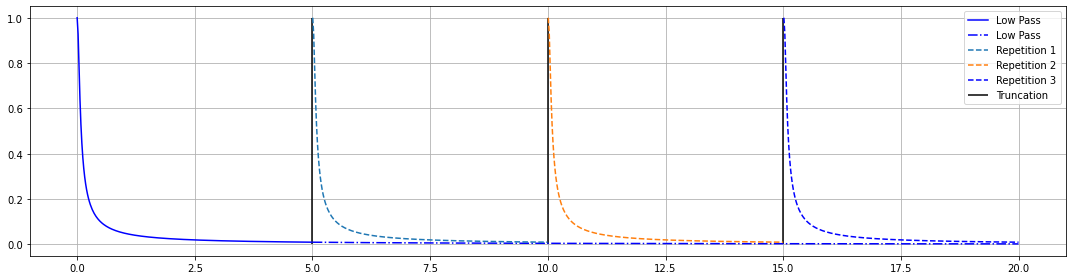

In [45]:
import matplotlib.pyplot as plt
import numpy as np

##############
# PARAMETERS #
##############
T=5 # When to truncate the function
tau = 20
omega = np.linspace(start=0, stop=20, num=1000, endpoint=True)

lp = np.abs(1/(1-1j*omega*tau) )

#########
# PLOTS #
#########
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

idx = (np.abs(omega - T)).argmin() # Closest value to T

ax.plot(omega[:idx], lp[:idx], "b", label="Low Pass")
ax.plot(omega[idx:], lp[idx:], "b-.", label="Low Pass")
ax.vlines(x=T, ymin=0, ymax=1, color="k", label="Truncation")

idx = (np.abs(omega - T)).argmin() # Closest value to T
i=1;
while ((i+1)*idx)<omega.shape[0]:
    ax.plot(omega[i*idx:(i+1)*idx], lp[:idx], "--", label="Repetition {:d}".format(i))
    ax.vlines(x=(i+1)*T, ymin=0, ymax=1, color="k")
    i=i+1

ax.plot(omega[i*idx:], lp[:omega.shape[0]-i*idx], "b--", label="Repetition {:d}".format(i))



ax.grid()
ax.legend()
fig.tight_layout()
plt.show()

## Discrete Fourier Transform

The _discrete Fourier Transform_ (DFT) is the discrete version of the Fourier Transform that does _not_ require the computation of integrals. The _Fast Fourier Transform_ (FFT) is a faster way ($\mathcal{O}(Nlog(N))$ instead of $\mathcal{O}(N^2)$) to compute the DFT with some minor additional constraints. Let's walk through the DFT:

```{admonition} Assumption
Assume a function $f$ which is periodic ($f(t+T)=f(t)$) and has period equal to an _even_ multiple of the sampling time T: $T_f=NT, N\in\mathcal{N}^{+}_{even}$. 
```

The Fourier series of such a function is:
\begin{align*}
f(t)&= \sum_k a_k e^{- i\frac{2\pi k}{NT}t} \\
a_k&= \frac{1}{NT} \int_{-\frac{NT}{2}}^{\frac{NT}{2}} f(t)  e^{i\frac{2\pi}{NT}kt} dt = \int_{0}^{NT} f(t)  e^{i\frac{2\pi}{NT}kt} dt\qquad \omega_k = \frac{2\pi}{NT}k, \quad k\in \mathcal{Z}\\
\end{align*}

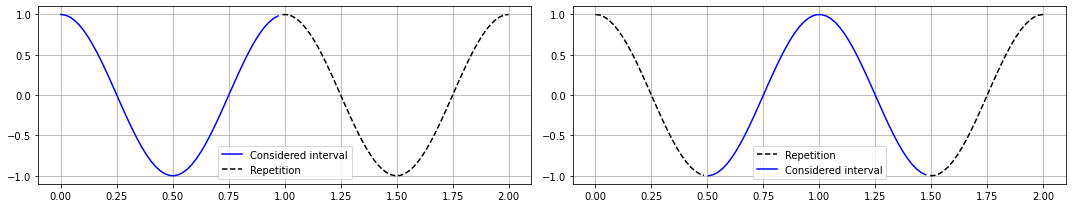

In [34]:
import matplotlib.pyplot as plt
import numpy as np

##############
# PARAMETERS #
##############
omega = np.linspace(start=0, stop=2, num=100, endpoint=True)


#########
# PLOTS #
#########
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

idx = (np.abs(omega - 1)).argmin() # Closest value to 2*pi

ax[0].plot(omega[:idx], np.cos(2*np.pi*omega[:idx]), "b", label="Considered interval")
ax[0].plot(omega[idx:], np.cos(2*np.pi*omega[idx:]), "k--", label="Repetition")

idx_s = (np.abs(omega - 0.5)).argmin() # Closest value to pi
idx_e = (np.abs(omega - 1.5)).argmin() # Closest value to 3*pi
ax[1].plot(omega[:idx_s], np.cos(2*np.pi*omega[:idx_s]), "k--", label="Repetition")
ax[1].plot(omega[idx_s:idx_e], np.cos(2*np.pi*omega[idx_s:idx_e]), "b", label="Considered interval")
ax[1].plot(omega[idx_e:], np.cos(2*np.pi*omega[idx_e:]), "k--", label="")


ax[0].grid(); ax[1].grid()
ax[0].legend(); ax[1].legend()
fig.tight_layout()
plt.show()

A minimal assumption that is essential to make is that
```{admonition} Assumption
$f(t)$ is $\frac{\pi}{T}$ band limited.
```
This assumption is minimal because one usually works with physical signals that needs to be sampled according to the [Nyquist-Shannon theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem):
\begin{align*}
-\frac{\pi}{T}\leq \omega_k \leq \frac{\pi}{T} \rightarrow -\frac{N}{2}\leq k < \frac{N}{2}
\end{align*}

That explains why N was choosen even too. The series can then be split into two terms depending on the value of $k$:

\begin{align*}
f(t)&= \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} = \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} + \sum_{k=-\frac{N}{2}}^{-1} a_k e^{-i\frac{2\pi}{NT}kt}
\end{align*}

It is possible to perform a change of variable in the second summation:
\begin{align*}
\sum_{k=-\frac{N}{2}}^{-1} a_k e^{-i\frac{2\pi}{NT}kt} = \sum_{k'=\frac{N}{2}}^{N-1} a_{k'-N} e^{-i\frac{2\pi}{NT}(k'-N)t} \qquad k'&=N+k\\
k&= k'-N
\end{align*}

so that the Fourier series becomes:

\begin{align*}
\require{cancel}
f(t)&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} + \sum_{k=-\frac{N}{2}}^{-1} a_k e^{-i\frac{2\pi}{NT}kt} \\
&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} + \sum_{k=\frac{N}{2}}^{N-1} a_{k-N} e^{-i\frac{2\pi}{NT}kt}e^{i\frac{2\pi}{\cancel{N}T}\cancel{N}t}
\end{align*}

As it was stated before, a physical signal is usually band limited and sampled with sampling time T:
\begin{align*}
f[n]=f(nT)&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{N\cancel{T}}kn\cancel{T}} + \sum_{k=\frac{N}{2}}^{N-1} a_{k-N} e^{-i\frac{2\pi}{N\cancel{T}}kn\cancel{T}}\cancelto{1}{e^{i\frac{2\pi}{T}nT}} \\
&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{N}kn} + \sum_{k=\frac{N}{2}}^{N-1} a_{k-N} e^{-i\frac{2\pi}{N}kn}
\end{align*}

this leads to a new series defined as:

\begin{align*}
F_k = \begin{cases}
a_k N \quad &\text{if } 0\leq k<\frac{N}{2} \\
a_{k-N}N \quad &\text{if } \frac{N}{2}\leq k<N \\
\end{cases} \quad \iff \quad a_k = \begin{cases}
\frac{F_k}{N} \quad &\text{if } 0\leq k<\frac{N}{2} \\
\frac{F_{k+N}}{N} \quad &\text{if } -\frac{N}{2}\leq k<0 \\
\end{cases}
\end{align*}

this new series allows to merge the two summations:
\begin{align*}
f[n] &= \sum_{k=0}^{\frac{N}{2}-1} \frac{F_k}{N} e^{-i\frac{2\pi}{N}kn} + \sum_{k=\frac{N}{2}}^{N-1} \frac{F_k}{N}e^{-i\frac{2\pi}{N}kn} \\
&= \frac{1}{N}\sum_{k=0}^{N-1} F_ke^{-i\frac{2\pi}{N}kn} \quad \text{Inverse DFT}
\end{align*}

As it is clear from the previous formula, the Inverse DFT allows us to compute the integral $a_k=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} f(t) e^{i\omega_k t}dt$ without needing to perform any kind of integration. Furthermore:

\begin{align*}
\sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}nl} &= \sum_{n=0} e^{i\frac{2\pi}{N}nl} \left(\frac{1}{N}\sum_{k=0}^{N-1}F_k e^{-i\frac{2\pi}{N}nk} \right)\\
&= \sum_{k=0} \frac{F_k}{N}\left[\sum_{n=0}^{N-1} e^{i\frac{2\pi}{N}n(l-k)}\right] \qquad [...]=\begin{cases}
\frac{1-e^{i2\pi/(l-k)}}{1-e^{i2\pi/(N(l-k))}}=0 \quad \text{if } l\not=k\\
N \quad \text{if } l=k 
\end{cases} \\&= \sum_{k=0}^{N-1}F_k \delta_{l,k}=F_l
\end{align*}

This relation provides an expression for the DFT. Summing up:

### Discrete Fourier Transform
\begin{align*}
F_k = \sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}nl}
\end{align*}

### Inverse Discrete Fourier Transform
\begin{align*}
f[n]=\frac{1}{N}\sum_{k=0}^{N-1} F_ke^{-i\frac{2\pi}{N}kn}
\end{align*}

It's is essential to remark that what was found is a **way to compute a continuous transform $\mathcal{FT}$ using only discrete summations** which computers can handle very well and with minimum errors.

## Properties of the DFT

### Periodicity
#### In time  
\begin{align*}
f[n+T]=\sum_{k=0}^{N-1}F_k e^{-i\frac{2\pi}{T}(n+T)k}=\sum_{k=0}^{N-1}F_k e^{-i\frac{2\pi}{T}nk} = f[n]
\end{align*}

#### In Frequency
\begin{align*}
F_{k+N} = \sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}n(k+N)} = \sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}nk} = F_k
\end{align*}

#### Perceval relation
```{warning}
As the actual energy of a periodic signal is infinite. For that reason, when talking about energy for a periodic signal, only one period is taken into account.
```

\begin{align*}
\sum_{n=0}^{N-1} \left| f[n]\right|^2 &= \sum_{n=0}^{N-1} \left( \frac{1}{N}\sum_{k=0}^{N-1}F_ke^{-i \frac{2\pi}{N}nk} \right)\left( \frac{1}{N} \sum_{l=0}^{N-1}F_l^* e^{i \frac{2\pi}{N}nl} \right) \\
&= \frac{1}{N^2} \sum_{k=0}^{N-1} \sum_{l=0}^{N-1} F_k F_l^* \cancelto{\delta_{l,k}}{\sum_{n=0}^{N-1}e^{i\frac{2\pi}{N}n(l+k)}} \\
\implies & \sum_{n=0}^{N-1} \left| f[n]\right|^2 = \frac{1}{N^2}\sum_{n=0}^{N-1} \left| F_k\right|^2
\end{align*}

Finally, before moving to a small exercise, let's introduce a new notation:

\begin{align*}
\begin{array}{l}
f_n &= f[n] \\
W_N&=e^{i\frac{2\pi}{N}} \quad \text{(Twiddle Factor)}\\
\end{array} \implies \begin{array}{l}
f_n &= \frac{1}{N}\sum_{k=0}^{N-1}F_k (W_N^*)^{nk} \qquad 0\leq k, n < N \\
F_k &= \sum_{n=0}^{N-1} f_n W_N^{nk}
\end{array}
\end{align*}

These two are the conventional form of the DFT and its inverse.
  
## Example
Let's now evaluate the Fourier transform of the cosine with the following parameters:
\begin{align*}
    N &= 8 \\
    f &= \frac{1}{4T} \\
    t &= nT \\
    f_n &= cos\left( 2\pi f t\right) = cos\left( \frac{2\pi}{4T} nT \right) = cos\left( \frac{\pi}{2}n\right) 
\end{align*}

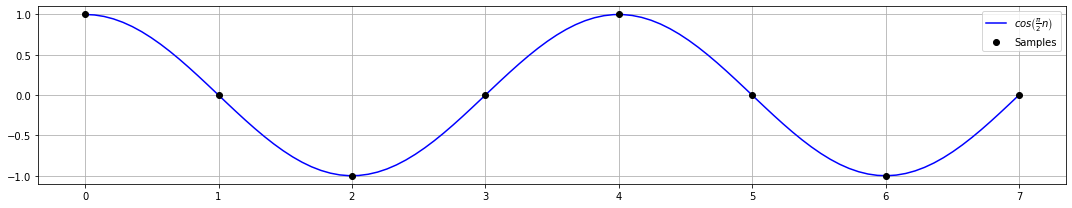

In [35]:
import matplotlib.pyplot as plt
import numpy as np

##############
# PARAMETERS #
##############
n = np.linspace(start=0, stop=8, num=8, endpoint=False)
t = np.linspace(start=0, stop=7, num=100, endpoint=True)

#########
# PLOTS #
#########
fig, ax = plt.subplots(1, 1, figsize=(15, 3))

ax.plot(t, np.cos(np.pi/2 * t), "b", label=r"$cos\left( \frac{\pi}{2}n\right)$")
ax.plot(n, np.cos(np.pi/2 * n), "ko", label="Samples")

ax.grid()
ax.legend()
fig.tight_layout()
plt.show()

\begin{align*}
    F_k &= \sum_{n=0}^{7} e^{i \frac{2\pi}{8}nk}f_n \qquad m=\frac{n}{2}\\
        &= \sum_{n=0}^{3}e^{i\frac{\pi}{2}mk}f_{2m} \\
        &= \sum_{n=0}^{3}e^{i\frac{\pi}{2}mk} (-1)^m \\
        &= 1 - e^{i\frac{\pi}{2}k} + e^{i\pi k} - e^{i\frac{3}{2}\pi k} \\
        &= 1 + (-1)^k - e^{i\frac{\pi}{2}k}\left[ 1+(-1)^k \right] \\
        &= \left[ 1 + (-1)^k \right] \left[ 1-e^{i\frac{\pi}{2}k} \right] \\
        &= \begin{cases}
                0 \qquad \text{if } k=0,4 \\
                0 \qquad \text{if } k=1,5 \\
                4 \qquad \text{if } k=2,6 \\
                0 \qquad \text{if } k=3,7 \\
            \end{cases}
\end{align*}

Or, in an other way:
\begin{align*}
        a_{-4}&=\frac{F_{-4+8}}{8}=\frac{F_4}{8}=0 \qquad a_0=0 \\
                 a_{-3}&=0 \qquad\qquad\qquad\qquad a_1=0\\
                 a_{-2}&=1/2 \qquad\qquad\qquad\quad\ a_2=1/2\\
                 a_{-1}&=0 \qquad\qquad\qquad\qquad a_3=0      \\
                 \\
         \implies& cos(2\pi ft) = \frac{1}{2}e^{-i 2\pi ft}+\frac{1}{2}e^{i 2\pi ft}
\end{align*}

which is in accordance with the known

\begin{align*}
    cos(2\pi ft) = \frac{e^{i 2\pi ft}+e^{-i 2\pi ft}}{2}
\end{align*}